# Task 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad as integrate  
from math import gamma


In [2]:
# Backbone: General Linear Congruence Generator
def GLCG(x0):
    a,b,m = 625,6571,31104
    while True:
        x0 = (a*x0+b)%m
        yield x0/m

glcg = GLCG(69)

def U(a,b):
    return a+(b-a)*next(glcg)

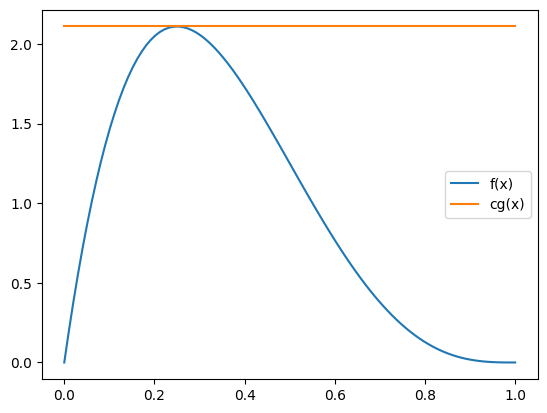

In [3]:
f = lambda x: 20*x*(1-x)**3
g = lambda x: x**0
c = 135/64

x = np.linspace(0,1,100)
plt.plot(x,f(x),label='f(x)')
plt.plot(x,c*g(x),label='cg(x)')
plt.legend()
plt.show()

## 1a
The average number of iterations required to generate one valid sample is equal to the expected value of a geometric distribution with a success probability of 1/c.

Thus, the expected tries are $1/p = 1/1/c = c = 135/64 = 2.109375$

## 1d
Verifying empirically,

In [4]:
def q1d(c=c):
    N = 10000
    tries = 0
    for i in range(N):
        while True:
            tries += 1
            x = U(0,1)
            y = U(0,1)
            if y <= f(x)/(c*g(x)):
                break
    print(f"Average number of tries taken: {tries/N}")
q1d()


Average number of tries taken: 2.1199


## 1b
### True mean is $EX$, given by $$ \mu = \int_{-\infty}^{\infty}xf(x)dx $$
### $$=\int_{0}^{1}x\cdot 20x(1-x)^3dx = 1/3$$

In [5]:
true_mean = integrate(lambda x: x*f(x),0,1)[0]
print("True mean is", true_mean)

True mean is 0.33333333333333337


In [6]:
def q1b(c=c):
    N = 10000
    Xs = []
    for i in range(N):
        while True:
            x = U(0,1)
            y = U(0,1)
            if y <= f(x)/(c*g(x)):
                Xs += [x]
                break

    sample_mean = np.mean(Xs)

    print(f'The sample mean is {sample_mean:.4f}')
    print(f'True Mean: {true_mean}')
q1b()

The sample mean is 0.3342
True Mean: 0.33333333333333337


## 1c
### True $P(0.25<X<0.75)$, given by $$\int_{0.25}^{0.75}f(x)dx $$
### $$=\int_{0.25}^{0.75}20x(1-x)^3dx = 0.6171875$$

In [7]:
def q1c(c=c):
    N = 10000
    Xs = []
    for i in range(N):
        while True:
            x = U(0,1)
            y = U(0,1)
            if y <= f(x)/(c*g(x)):
                Xs += [int(0.25<x<0.75)]
                break

    sample_P = np.mean(Xs)
    true_P = integrate(lambda x: f(x),0.25,0.75)[0]

    print(f'The sample probability is {sample_P:.4f}')
    print(f'True Probability: {true_P}')
    print(f"Error = {100*abs(sample_P-true_P)/true_P:.4f}%")
q1c()

The sample probability is 0.6150
True Probability: 0.6171875
Error = 0.3544%


## 1d done above

## 1e Histogram and PDF Graph 


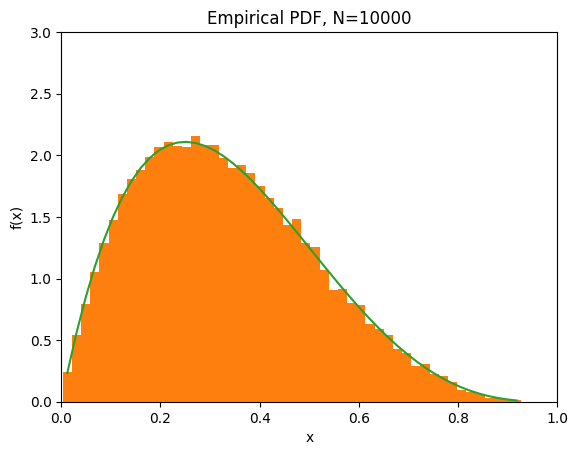

In [8]:
def q1e(c=c):
    N = 10000
    Xs = []

    Xs = []
    for _ in range(N):
        while True:
            x = U(0,1)
            y = U(0,1)
            if y <= f(x)/(c*g(x)):
                Xs += [x]
                break

    #x = np.linspace(-0.01,5.01,1000)
    plt.hist(Xs,bins=50,density=True)


    y, x, _ = plt.hist(Xs,bins=50,density=True)
    centers = (x[1:] + x[:-1]) / 2
    plt.plot(centers, f(centers))

    plt.title(f"Empirical PDF, N={N}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.xlim(0,1); plt.ylim(0,3)
    plt.show()

q1e()

## 1f Repeat for c = 10, 50


Using C = 10
Q1b
The sample mean is 0.3342
True Mean: 0.33333333333333337
Q1c
The sample probability is 0.6170
True Probability: 0.6171875
Error = 0.0304%
Q1d
Average number of tries taken: 9.9947
Q1e


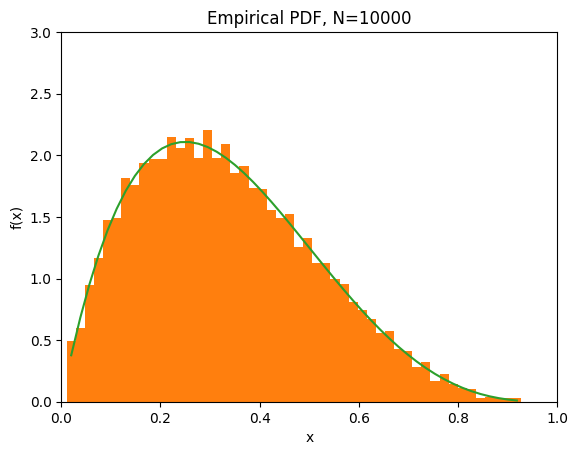

Using C = 50
Q1b
The sample mean is 0.3316
True Mean: 0.33333333333333337
Q1c
The sample probability is 0.6099
True Probability: 0.6171875
Error = 1.1808%
Q1d
Average number of tries taken: 49.7134
Q1e


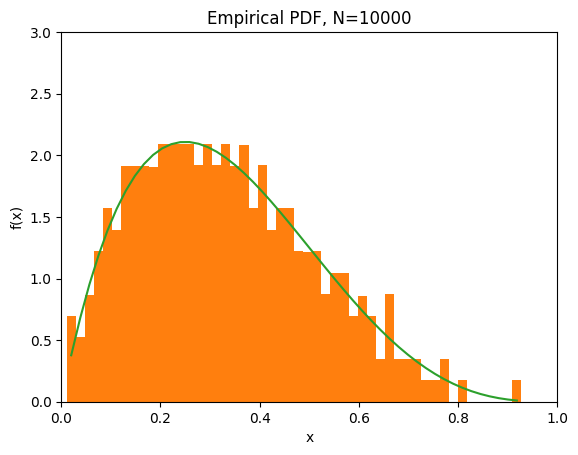

In [9]:
for c_new in (10,50):
    #q1a(c_new): just calculation
    print("Using C =",c_new)
    print("Q1b")
    q1b(c_new)
    print("Q1c")
    q1c(c_new)
    print("Q1d")
    q1d(c_new)
    print("Q1e")
    q1e(c_new)

# Task 2

### The rejection constant c is easily found in each case by $$c = \frac{1/\alpha+1/e}{\Gamma(\alpha)}$$
### Letting $A = 1/\alpha+1/e$, we have:
### The dominating density function is $g(x) = \frac{1}{A}x^{\alpha-1}$   if $x<1$   else  $\frac{1}{A}e^{-x}$

In [10]:
for Alpha in (0.7, 3, 3.7):
    frac_alpha = Alpha-int(Alpha) + 1e-6
    int_alpha = int(Alpha)

    # Generate for fractional part

    A = 1 / frac_alpha + 1 / np.e
    c = A / gamma(frac_alpha)

    # Fudge x by epsilon = 1e-6 to prevent 0^0 or dumb shit like that
    f_target= lambda x: ((x+1e-6)**(frac_alpha-1)) * np.exp(-x)/gamma(frac_alpha)
    g_dominating = lambda x: (x<1)*((x+1e-6)**(frac_alpha-1))/A + (x>=1)*np.exp(-x)/A
    G_INV = lambda x: (x<1/frac_alpha/A)*(frac_alpha*A*x)**(1/frac_alpha) + (x>=1/frac_alpha/A)*(-np.log(1-x)-np.log(A))

    N = 10000
    Xs = []
    for i in range(N):
        while True:
            x = U(0,1)
            x = G_INV(x)
            y = U(0,1)
            if y <= f_target(x)/(c*g_dominating(x)):
                Xs.append(x)
                break

    # Generate for integer part
    Ys = [sum(-np.log( U(0,1)+1e-6 ) for _ in range(int_alpha)) for i in range(N)]
    
    
    true_mean = true_var = Alpha

    Xs = np.array(Xs)
    Ys = np.array(Ys)

    Zs = Xs if not int_alpha else Ys if not frac_alpha else Xs+Ys

    print(f"Alpha set to {Alpha}")
    print(f"Rejection Constant, c = {c}")
    print(f"Mean is {Zs.mean():.4f}, should be {true_mean}")
    print(f"Error = {100*abs(Zs.mean()-true_mean)/true_mean:.4f}%")
    print(f"Variance is {Zs.var():.4f}, should be {true_var}")
    print(f"Error = {100*abs(Zs.var()-true_var)/true_var:.4f}%")
    print()


Alpha set to 0.7
Rejection Constant, c = 1.3839556569395488
Mean is 0.6994, should be 0.7
Error = 0.0789%
Variance is 0.7003, should be 0.7
Error = 0.0489%

Alpha set to 3
Rejection Constant, c = 1.0000009450946625
Mean is 3.0025, should be 3
Error = 0.0841%
Variance is 3.0095, should be 3
Error = 0.3168%

Alpha set to 3.7
Rejection Constant, c = 1.383955656939549
Mean is 3.7033, should be 3.7
Error = 0.0884%
Variance is 3.7428, should be 3.7
Error = 1.1565%

